In [1]:
import numpy as np
import Parse_data
import poison

test_images = './Mnist/Mnist/test-images.idx3-ubyte'
test_labels = './Mnist/Mnist/test-labels.idx1-ubyte'
train_images = './Mnist/Mnist/train-images.idx3-ubyte'
train_labels = './Mnist/Mnist/train-labels.idx1-ubyte'

x_train = Parse_data.decode_idx3_ubyte(train_images)
x_test =  Parse_data.decode_idx3_ubyte(test_images)
y_train = Parse_data.decode_idx1_ubyte(train_labels)
y_test =  Parse_data.decode_idx1_ubyte(test_labels)

x_test = x_test.reshape(10000, 28*28)
x_train = x_train.reshape(60000, 28*28)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(y_train)


解析文件： ./Mnist/Mnist/train-images.idx3-ubyte
魔数：2051，图片数：60000
28 28
解析文件： ./Mnist/Mnist/test-images.idx3-ubyte
魔数：2051，图片数：10000
28 28
解析文件： ./Mnist/Mnist/train-labels.idx1-ubyte
魔数：2049，标签数：60000
解析文件： ./Mnist/Mnist/test-labels.idx1-ubyte
魔数：2049，标签数：10000
[5 0 4 ... 5 6 8]


(60000,)
[24683 21002 16732 ... 59786 52775 58268]
训练完成
8116
(60000,)
[ 9100 29983 50343 ... 44359  4785 19412]
训练完成
7332
(60000,)
[13749 38327 24940 ... 49550 15432 41571]
训练完成
6560
(60000,)
[28541 48136 51785 ... 35849 14310 41854]
训练完成
5087
(60000,)
[32147 56928  9862 ... 48939 13181 44035]
训练完成
3920
(60000,)
[30678 34219 20630 ... 28554 38899 21844]
训练完成
2906
(60000,)
[15162 35452 25558 ... 13874 17179 50623]
训练完成
1938
(60000,)
[19571 14430 42511 ... 39649 17724 32541]
训练完成
1336
(60000,)
[51436  8989 38640 ... 22780 30461 18003]
训练完成
1079
(60000,)
[28589 49400  8992 ... 19600  3990 10982]
训练完成
839


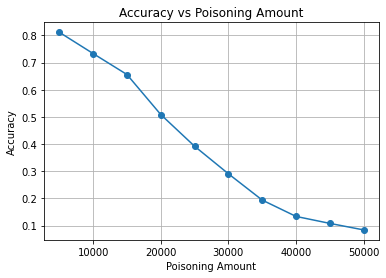

In [2]:
import matplotlib.pyplot as plt

from classifier import DecisionTree, accuracy_score


# 构建决策树分类器
tree = DecisionTree(max_depth=20, min_samples_split=2, criterion='gini')

poison_range = range(5000, 50001, 5000)  # 投毒数量范围
accuracy_scores = []  # 保存准确率

for poison_num in poison_range:
    # 生成投毒样本
    y_train_poison = poison.poison(y_train, poison_num)

    # 训练决策树
    tree.fit(x_train, y_train_poison)

    # 在测试集上进行预测
    y_pred = tree.predict(x_test)

    # 计算准确率
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# 绘制准确率变化图
plt.plot(poison_range, accuracy_scores, marker='o')
plt.xlabel('Poisoning Amount')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Poisoning Amount')
plt.grid(True)
plt.show()